## Adaboost Model on Dataset with Bets

In [6]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from importlib import reload


In [51]:
data = pd.read_csv('Data_Structures/FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED.csv',index_col=0)

In [52]:

X_data=data.drop(['Label'],axis=1)
Y_data=data['Label']

s = StratifiedShuffleSplit(n_splits=2, test_size = 0.2, random_state=0)
for train_index, test_index in s.split(X_data, Y_data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_b, X_test_b = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train_b, y_test_b = Y_data.iloc[train_index], Y_data.iloc[test_index]


# Show the results of the split
print ("Training set has {} samples.".format(X_train_b.shape[0]))
print ("Testing set has {} samples.".format(X_test_b.shape[0]))

Training set has 12613 samples.
Testing set has 3154 samples.


In [4]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])    
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = f1_score(y_train[:300], predictions_train,
                                     average='micro')
    # Compute F-score on the test set which is y_test
    results['f_test'] = f1_score(y_test, predictions_test, 
                                    average='micro')  
    # Success
    print ("{} trained.".format(learner.__class__.__name__))
        
    # Return the results
    return results

In [30]:
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

In [31]:
results = train_predict(clf, X_train_b, y_train_b, X_test_b, y_test_b)

AdaBoostClassifier trained.


In [32]:
results

{'acc_test': 0.5221940393151554,
 'acc_train': 0.62,
 'f_test': 0.5221940393151554,
 'f_train': 0.62,
 'train_time': 43.517579793930054}

In [18]:
import itertools

******************************************************************
Confusion matrix for AdaBoost classifier
Normalized confusion matrix
[[ 0.48  0.14  0.38]
 [ 0.26  0.18  0.57]
 [ 0.14  0.12  0.74]]


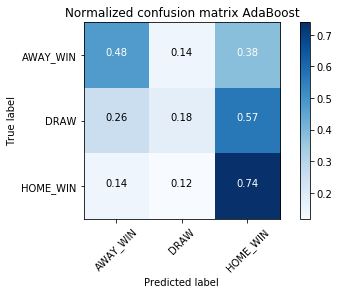

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

LABELS = ['HOME_WIN', 'AWAY_WIN', 'DRAW']
le.fit(LABELS)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


'''
CONFUSIOM MATRIX FOR ADABOOST
'''
y_pred = clf.predict(X_test_b)
cnf_matrix_adaboost = confusion_matrix(y_test_b, y_pred)
np.set_printoptions(precision=2)


CLASSES_NAME = le.inverse_transform([0,1,2])

print ("******************************************************************")
print ("Confusion matrix for AdaBoost classifier")
plt.figure()
plot_confusion_matrix(cnf_matrix_adaboost, classes=CLASSES_NAME, normalize=True,
                      title='Normalized confusion matrix AdaBoost')
plt.show()


### Hyperparameter tuning


In [25]:
#from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

# Initialize the classifier
clf = AdaBoostClassifier()


'''
MY BASE CLASSIFIER
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)
                         
'''
parameters = {'base_estimator': [tree.DecisionTreeClassifier(max_depth=1),
                                tree.DecisionTreeClassifier(max_depth=2)], 
              'n_estimators': [1000], 
              'algorithm' : ['SAMME', 'SAMME.R'],
              'random_state' : [1]}

# Make an fbeta_score scoring object using make_scorer()
#scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()

grid_obj = GridSearchCV(clf, parameters, scoring = "accuracy", verbose = 5)

#Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_b, y_train_b)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 
[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5443519619500594, total=  29.4s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.9s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5365041617122474, total=  29.3s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   59.6s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5279562217463717, total=  26.5s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.527705112960761, total=  50.6s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5393579072532699, total=  50.5s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 
[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
        

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  8.1min finished


In [33]:
## Unoptimized Model
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

# Get the estimator
best_clf = grid_fit.best_estimator_
print (best_clf)

# Make predictions using the unoptimized and model
print ("Unoptimized model\n------")
results = train_predict(clf, X_train_b, y_train_b, X_test_b, y_test_b)
print(results)
print ("\nOptimized Model\n------")
results = train_predict(best_clf, X_train_b, y_train_b, X_test_b, y_test_b)
print(results)


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=1)
Unoptimized model
------
AdaBoostClassifier trained.
{'train_time': 43.41140794754028, 'acc_train': 0.62, 'acc_test': 0.5221940393151554, 'f_train': 0.62, 'f_test': 0.5221940393151554}

Optimized Model
------
AdaBoostClassifier trained.
{'train_time': 41.72636151313782, 'acc_train': 0.57333333333333336, 'acc_test': 0.54026632847178191, 'f_train': 0.57333333333333336, 'f_test': 0.54026632847178191}


## Some observations 

In [41]:
from collections import Counter
c=Counter(Y_data)

print ("Home_Win Percentage :", c[2]/Y_data.shape[0]*100)
print ("Away_Win Percentage :", c[1]/Y_data.shape[0]*100)
print ("Draw Percentage :", c[0]/Y_data.shape[0]*100)


Home_Win Percentage : 46.01382634616604
Away_Win Percentage : 25.331388342741167
Draw Percentage : 28.65478531109279


******************************************************************
Confusion matrix for AdaBoost classifier
Normalized confusion matrix
[[ 0.53  0.04  0.42]
 [ 0.3   0.05  0.65]
 [ 0.16  0.02  0.81]]


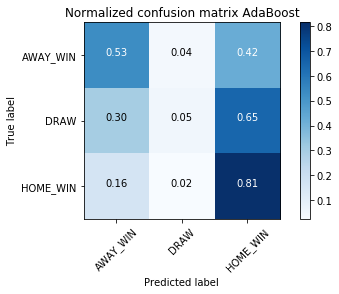

In [42]:
'''
CONFUSIOM MATRIX FOR ADABOOST
'''
y_pred = best_clf.predict(X_test_b)
cnf_matrix_adaboost = confusion_matrix(y_test_b, y_pred)
np.set_printoptions(precision=2)


CLASSES_NAME = le.inverse_transform([0,1,2])

print ("******************************************************************")
print ("Confusion matrix for AdaBoost classifier")
plt.figure()
plot_confusion_matrix(cnf_matrix_adaboost, classes=CLASSES_NAME, normalize=True,
                      title='Normalized confusion matrix AdaBoost')
plt.show()


#### Home Wins
Based on the confusion matrix for the best classifier, it is pretty good at predicting home wins. Through statistics, home wins occur 46% of the time; so predicting 81% is really good.

#### Away Wins
Away wins statistically occur 25% of the time, the model predicts the correct result for an away win 53% of the time.

#### Draw
Draws occur 28% of the time, the model predicts the correct result for a draw only 5%. We can see that the model is bad at predicting draws

### Let's do some more tuning

In [55]:
clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=1)

In [57]:

param_test1 = {
    'algorithm': ['SAMME.R','SAMME']
}
gsearch1 = GridSearchCV(estimator = clf, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.50749, std: 0.00471, params: {'algorithm': 'SAMME.R'},
  mean: 0.53627, std: 0.00670, params: {'algorithm': 'SAMME'}],
 {'algorithm': 'SAMME'},
 0.53627078180289278)

In [61]:
clf_1 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=1000, random_state = 1)
param_test1 = {
    'base_estimator': [tree.DecisionTreeClassifier(max_depth=x) for x in range(1,5)]
}
gsearch1 = GridSearchCV(estimator = clf_1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53627, std: 0.00670, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')},
  mean: 0.53294, std: 0.00483, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')},
  mean: 0.52152, std: 0.00337, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
   

In [62]:

param_test1 = {
    'learning_rate': [i/1000.0 for i in range(1,50,5)]
}
gsearch1 = GridSearchCV(estimator = clf_1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53587, std: 0.00950, params: {'learning_rate': 0.001},
  mean: 0.53833, std: 0.00701, params: {'learning_rate': 0.006},
  mean: 0.54222, std: 0.00706, params: {'learning_rate': 0.011},
  mean: 0.54230, std: 0.00711, params: {'learning_rate': 0.016},
  mean: 0.54198, std: 0.00689, params: {'learning_rate': 0.021},
  mean: 0.54127, std: 0.00639, params: {'learning_rate': 0.026},
  mean: 0.54158, std: 0.00661, params: {'learning_rate': 0.031},
  mean: 0.54111, std: 0.00532, params: {'learning_rate': 0.036},
  mean: 0.54158, std: 0.00529, params: {'learning_rate': 0.041},
  mean: 0.54119, std: 0.00565, params: {'learning_rate': 0.046}],
 {'learning_rate': 0.016},
 0.54229603470106891)

In [63]:

param_test1 = {
    'learning_rate': [i/1000.0 for i in range(16,21)]
}
gsearch1 = GridSearchCV(estimator = clf_1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54230, std: 0.00711, params: {'learning_rate': 0.016},
  mean: 0.54206, std: 0.00695, params: {'learning_rate': 0.017},
  mean: 0.54222, std: 0.00706, params: {'learning_rate': 0.018},
  mean: 0.54198, std: 0.00689, params: {'learning_rate': 0.019},
  mean: 0.54190, std: 0.00683, params: {'learning_rate': 0.02}],
 {'learning_rate': 0.016},
 0.54229603470106891)

In [68]:
clf_2 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=1000, random_state = 1,learning_rate=0.016)
param_test1 = {
    'n_estimators': [i for i in range(100,1500,100)]
}
gsearch1 = GridSearchCV(estimator = clf_2, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53849, std: 0.00950, params: {'n_estimators': 100},
  mean: 0.53294, std: 0.01215, params: {'n_estimators': 200},
  mean: 0.53817, std: 0.00710, params: {'n_estimators': 300},
  mean: 0.53802, std: 0.00672, params: {'n_estimators': 400},
  mean: 0.54158, std: 0.00665, params: {'n_estimators': 500},
  mean: 0.54230, std: 0.00712, params: {'n_estimators': 600},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 700},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 800},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 900},
  mean: 0.54230, std: 0.00711, params: {'n_estimators': 1000},
  mean: 0.54214, std: 0.00700, params: {'n_estimators': 1100},
  mean: 0.54214, std: 0.00700, params: {'n_estimators': 1200},
  mean: 0.54182, std: 0.00678, params: {'n_estimators': 1300},
  mean: 0.54174, std: 0.00672, params: {'n_estimators': 1400}],
 {'n_estimators': 600},
 0.54229603470106902)

In [69]:

param_test1 = {
    'n_estimators': [i for i in range(600,700,10)]
}
gsearch1 = GridSearchCV(estimator = clf_2, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54230, std: 0.00712, params: {'n_estimators': 600},
  mean: 0.54230, std: 0.00712, params: {'n_estimators': 610},
  mean: 0.54230, std: 0.00712, params: {'n_estimators': 620},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 630},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 640},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 650},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 660},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 670},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 680},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 690}],
 {'n_estimators': 600},
 0.54229603470106902)

In [70]:
clf_3 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=600, random_state = 1,learning_rate=0.016)

results = train_predict(clf_3, X_train_b, y_train_b, X_test_b, y_test_b)

AdaBoostClassifier trained.


In [71]:
results

{'acc_test': 0.54850982878883958,
 'acc_train': 0.56666666666666665,
 'f_test': 0.54850982878883958,
 'f_train': 0.56666666666666665,
 'train_time': 25.849900484085083}

After tuning some parameters, we were able to reach an accuracy of 54.8% on this dataset! Let's try adding the team ratings features and removing the Betting features.

## Adaboost Model on Dataset with Team Ratings and No Bets

In [73]:
data = pd.read_csv('Data_Structures/FINAL_BASE_DATASET_TEAM_RATINGS_ADDED_NO_BETS_ZEROS_NOT_REMOVED.csv',index_col=0)

In [74]:

X_data=data.drop(['Label'],axis=1)
Y_data=data['Label']

s = StratifiedShuffleSplit(n_splits=2, test_size = 0.2, random_state=0)
for train_index, test_index in s.split(X_data, Y_data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_b, X_test_b = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train_b, y_test_b = Y_data.iloc[train_index], Y_data.iloc[test_index]


# Show the results of the split
print ("Training set has {} samples.".format(X_train_b.shape[0]))
print ("Testing set has {} samples.".format(X_test_b.shape[0]))

Training set has 13887 samples.
Testing set has 3472 samples.


In [45]:
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

In [46]:
results = train_predict(clf, X_train_b, y_train_b, X_test_b, y_test_b)

AdaBoostClassifier trained.


In [47]:
results

{'acc_test': 0.52880184331797231,
 'acc_train': 0.57333333333333336,
 'f_test': 0.52880184331797231,
 'f_train': 0.57333333333333336,
 'train_time': 44.221764087677}

******************************************************************
Confusion matrix for AdaBoost classifier
Normalized confusion matrix
[[ 0.46  0.11  0.44]
 [ 0.23  0.16  0.61]
 [ 0.13  0.09  0.78]]


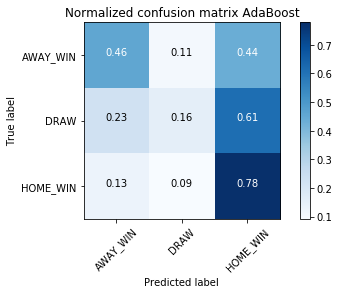

In [48]:
'''
CONFUSIOM MATRIX FOR ADABOOST
'''
y_pred = clf.predict(X_test_b)
cnf_matrix_adaboost = confusion_matrix(y_test_b, y_pred)
np.set_printoptions(precision=2)


CLASSES_NAME = le.inverse_transform([0,1,2])

print ("******************************************************************")
print ("Confusion matrix for AdaBoost classifier")
plt.figure()
plot_confusion_matrix(cnf_matrix_adaboost, classes=CLASSES_NAME, normalize=True,
                      title='Normalized confusion matrix AdaBoost')
plt.show()


In [49]:
# Initialize the classifier
clf = AdaBoostClassifier()


'''
MY BASE CLASSIFIER
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)
                         
'''
parameters = {'base_estimator': [tree.DecisionTreeClassifier(max_depth=1),
                                tree.DecisionTreeClassifier(max_depth=2)], 
              'n_estimators': [1000], 
              'algorithm' : ['SAMME', 'SAMME.R'],
              'random_state' : [1]}

# Make an fbeta_score scoring object using make_scorer()
#scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()

grid_obj = GridSearchCV(clf, parameters, scoring = "accuracy", verbose = 5)

#Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_b, y_train_b)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 
[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5295896328293737, total=  29.0s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.5s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5222462203023758, total=  28.6s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   58.7s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5390101577696131, total=  28.2s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5205183585313174, total=  54.4s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.4min remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5287257019438445, total=  54.1s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 
[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
        

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  8.6min finished


In [50]:
## Unoptimized Model
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

# Get the estimator
best_clf = grid_fit.best_estimator_
print (best_clf)

# Make predictions using the unoptimized and model
print ("Unoptimized model\n------")
results = train_predict(clf, X_train_b, y_train_b, X_test_b, y_test_b)
print(results)
print ("\nOptimized Model\n------")
results = train_predict(best_clf, X_train_b, y_train_b, X_test_b, y_test_b)
print(results)


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=1)
Unoptimized model
------
AdaBoostClassifier trained.
{'train_time': 43.68955445289612, 'acc_train': 0.57333333333333336, 'acc_test': 0.52880184331797231, 'f_train': 0.57333333333333336, 'f_test': 0.52880184331797231}

Optimized Model
------
AdaBoostClassifier trained.
{'train_time': 42.29925179481506, 'acc_train': 0.53666666666666663, 'acc_test': 0.5429147465437788, 'f_train': 0.53666666666666663, 'f_test': 0.5429147465437788}


### Let's do some more tuning

In [72]:
## Unoptimized Model
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

In [75]:

param_test1 = {
    'algorithm': ['SAMME.R','SAMME']
}
gsearch1 = GridSearchCV(estimator = clf, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.50738, std: 0.00178, params: {'algorithm': 'SAMME.R'},
  mean: 0.53028, std: 0.00686, params: {'algorithm': 'SAMME'}],
 {'algorithm': 'SAMME'},
 0.53028200363378752)

In [76]:
clf_1 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=1000, random_state = 1)
param_test1 = {
    'base_estimator': [tree.DecisionTreeClassifier(max_depth=x) for x in range(1,5)]
}
gsearch1 = GridSearchCV(estimator = clf_1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53028, std: 0.00686, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')},
  mean: 0.52690, std: 0.00464, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')},
  mean: 0.51624, std: 0.00552, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
   

In [77]:

param_test1 = {
    'learning_rate': [i/1000.0 for i in range(1,50,5)]
}
gsearch1 = GridSearchCV(estimator = clf_1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.51725, std: 0.00548, params: {'learning_rate': 0.001},
  mean: 0.52783, std: 0.00544, params: {'learning_rate': 0.006},
  mean: 0.52877, std: 0.00613, params: {'learning_rate': 0.011},
  mean: 0.52999, std: 0.00619, params: {'learning_rate': 0.016},
  mean: 0.53057, std: 0.00507, params: {'learning_rate': 0.021},
  mean: 0.53194, std: 0.00570, params: {'learning_rate': 0.026},
  mean: 0.53215, std: 0.00561, params: {'learning_rate': 0.031},
  mean: 0.53223, std: 0.00492, params: {'learning_rate': 0.036},
  mean: 0.53215, std: 0.00544, params: {'learning_rate': 0.041},
  mean: 0.53165, std: 0.00593, params: {'learning_rate': 0.046}],
 {'learning_rate': 0.036},
 0.53222561473232133)

In [78]:
clf_2 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=1000, random_state = 1,learning_rate=0.036)
param_test1 = {
    'n_estimators': [i for i in range(100,1500,100)]
}
gsearch1 = GridSearchCV(estimator = clf_2, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52308, std: 0.00639, params: {'n_estimators': 100},
  mean: 0.52884, std: 0.00546, params: {'n_estimators': 200},
  mean: 0.52877, std: 0.00599, params: {'n_estimators': 300},
  mean: 0.52992, std: 0.00590, params: {'n_estimators': 400},
  mean: 0.53028, std: 0.00578, params: {'n_estimators': 500},
  mean: 0.53100, std: 0.00492, params: {'n_estimators': 600},
  mean: 0.53136, std: 0.00561, params: {'n_estimators': 700},
  mean: 0.53244, std: 0.00618, params: {'n_estimators': 800},
  mean: 0.53223, std: 0.00538, params: {'n_estimators': 900},
  mean: 0.53223, std: 0.00492, params: {'n_estimators': 1000},
  mean: 0.53208, std: 0.00508, params: {'n_estimators': 1100},
  mean: 0.53251, std: 0.00553, params: {'n_estimators': 1200},
  mean: 0.53237, std: 0.00536, params: {'n_estimators': 1300},
  mean: 0.53251, std: 0.00513, params: {'n_estimators': 1400}],
 {'n_estimators': 1200},
 0.532513918445634)

In [79]:
param_test1 = {
    'n_estimators': [i for i in range(1200,1300,10)]
}
gsearch1 = GridSearchCV(estimator = clf_2, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53251, std: 0.00553, params: {'n_estimators': 1200},
  mean: 0.53251, std: 0.00517, params: {'n_estimators': 1210},
  mean: 0.53266, std: 0.00556, params: {'n_estimators': 1220},
  mean: 0.53266, std: 0.00538, params: {'n_estimators': 1230},
  mean: 0.53259, std: 0.00547, params: {'n_estimators': 1240},
  mean: 0.53223, std: 0.00521, params: {'n_estimators': 1250},
  mean: 0.53251, std: 0.00527, params: {'n_estimators': 1260},
  mean: 0.53273, std: 0.00537, params: {'n_estimators': 1270},
  mean: 0.53259, std: 0.00536, params: {'n_estimators': 1280},
  mean: 0.53251, std: 0.00535, params: {'n_estimators': 1290}],
 {'n_estimators': 1270},
 0.53272994784579752)

In [80]:
clf_3 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=1270, random_state = 1,learning_rate=0.036)

results = train_predict(clf_3, X_train_b, y_train_b, X_test_b, y_test_b)

AdaBoostClassifier trained.


In [81]:
results

{'acc_test': 0.54089861751152069,
 'acc_train': 0.52333333333333332,
 'f_test': 0.54089861751152069,
 'f_train': 0.52333333333333332,
 'train_time': 54.059043169021606}